In [1]:
import pandas as pd
import numpy as numpy
from scipy import stats
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
dados=pd.read_csv("all_keyboards.csv")

In [3]:
dados

,Unnamed: 0,Name,Price,Stores,Rating,Votes,Type,Connection,Colors,Switches
0,0,Philips K264,7.50,41,4.7,6,Keyboard Only,USB,0,NaN
1,1,Philips SPT6324 Black,9.99,20,4.1,25,Keyboard and Mouse Set,USB,0,NaN
2,2,Philips SPT6224 Black,8.93,37,4.7,3,Keyboard and Mouse Set,USB,0,NaN
3,3,Logitech MX Keys,106.44,8,4.5,8,Keyboard Only,Bluetooth / USB,0,NaN
4,4,Powertech PT-677,3.99,68,2.7,7,Keyboard Only,USB,0,NaN
...,...,...,...,...,...,...,...,...,...,...
1265,1265,Esperanza TK105,6.80,9,1.0,1,NaN,NaN,0,Membrane
1266,1266,Keep Out F90E Gaming USB,39.90,6,2.3,6,NaN,NaN,0,Membrane
1267,1267,Gigabyte K8100,75.00,0,0.0,0,NaN,NaN,0,Membrane
1268,1268,Approx Quasar,29.00,0,1.0,1,NaN,NaN,0,Membrane


In [4]:
dados.describe()

,Unnamed: 0,Price,Stores,Rating,Votes,Colors
count,1270.00000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000
mean,634.50000,51.395740,7.303937,2.250315,11.619685,0.255906
std,366.76173,51.951831,18.979992,2.183142,73.741970,0.804749
min,0.00000,2.770000,0.000000,0.000000,0.000000,0.000000
25%,317.25000,15.425000,0.000000,0.000000,0.000000,0.000000
50%,634.50000,33.000000,3.000000,2.900000,1.000000,0.000000
75%,951.75000,65.332500,8.000000,4.500000,4.000000,0.000000
max,1269.00000,399.000000,247.000000,5.000000,914.000000,6.000000


In [5]:
cor=dados.drop(['Colors','Switches'],axis=1)
cor.isnull().sum()

Unnamed: 0      0
Name            0
Price           0
Stores          0
Rating          0
Votes           0
Type          698
Connection    698
dtype: int64

In [59]:
clear_rating= cor['Rating']!=0.0
rating=cor.loc[clear_rating,:]
trocar1=rating.Type.replace(['Keyboard Only','Keyboard and Mouse Set','Keyboard with Touchpad'],[1,2,3],inplace=True)
rating['Type'].fillna("0",inplace=True)
rating

,Unnamed: 0,Name,Price,Stores,Rating,Votes,Type,Connection
0,0,Philips K264,7.50,41,4.7,6,1,USB
1,1,Philips SPT6324 Black,9.99,20,4.1,25,2,USB
2,2,Philips SPT6224 Black,8.93,37,4.7,3,2,USB
3,3,Logitech MX Keys,106.44,8,4.5,8,1,Bluetooth / USB
4,4,Powertech PT-677,3.99,68,2.7,7,1,USB
...,...,...,...,...,...,...,...,...
1263,1263,Omega Varr VK-1,15.00,0,3.0,4,0,NaN
1264,1264,A4Tech Bloody & Sades Gaming set,156.07,0,1.0,2,0,NaN
1265,1265,Esperanza TK105,6.80,9,1.0,1,0,NaN
1266,1266,Keep Out F90E Gaming USB,39.90,6,2.3,6,0,NaN


In [79]:
Philips=rating.Name.str.contains('Logitech')


rating['Philips']=Philips
rating.Philips.value_counts()

False    631
True      54
Name: Philips, dtype: int64

In [40]:
stores_0=rating['Stores']==0
stores_0.value_counts()
#VIsa observar a quantidade de produtos com 0 Stores disponeis é igual a 0 

False    547
True     138
Name: Stores, dtype: int64

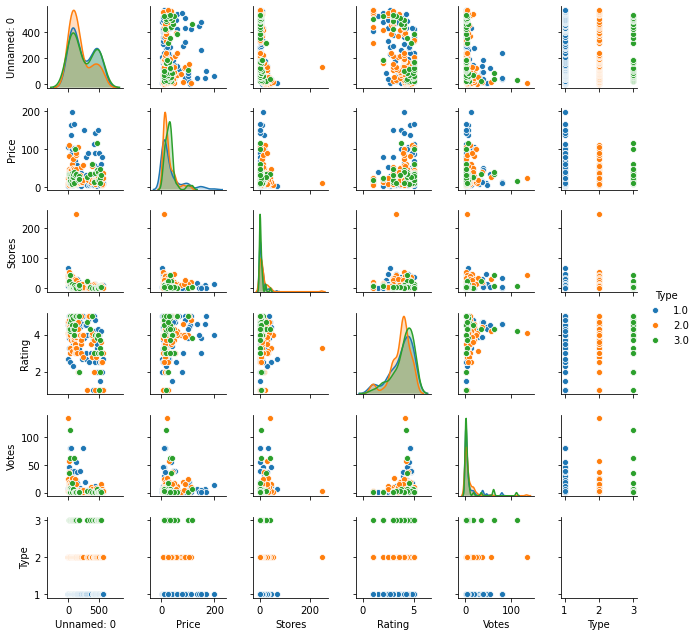

In [41]:
sns.pairplot(rating,height=1.5,hue='Type')

In [ ]:
#Regressão Multipla

In [61]:
import statsmodels.api as sm 

def regress (y,x):
    xc=sm.add_constant(x)
    model=sm.OLS(y,xc.astype(float))
    resultado=model.fit()
    return resultado

In [74]:
#Após observar a tabela de resultados utilizando todos as variaveis quantitativas percebe-se que a variavel Votes não tem influencia no valor do teclado por apresentar um valor de P>t maior que o alpha de 0.1, Logo afim de prever melhor o valor do equipamento foi retirado da analise.

y=rating['Price']
x=rating[['Stores','Rating','Type','Philips']]

resultado2=regress(y,x)
resultado2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.137
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     27.05
Date:                Thu, 19 Nov 2020   Prob (F-statistic):           7.48e-21
Time:                        15:25:01   Log-Likelihood:                -3610.9
No. Observations:                 685   AIC:                             7232.
Df Residuals:                     680   BIC:                             7254.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.7609      9.269      1.808      0.071      -1.438      34.959
Stores        -0.3304      0.129     -2.559      0.011      -0.584      -0.077
Rating        11.4138      2.069      5.515      0.000       7.351      15.477
Type         -12.6503      2.036     -6.213      0.000     -16.648      -8.653
Philips      -25.4974     14.668     -1.738      0.083     -54.298       3.303
==============================================================================
Omnibus:                      213.353   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              521.908
Skew:                           1.634   Prob(JB):                    4.67e-114
Kurtosis:                       5.759   Cond. No.                         138.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

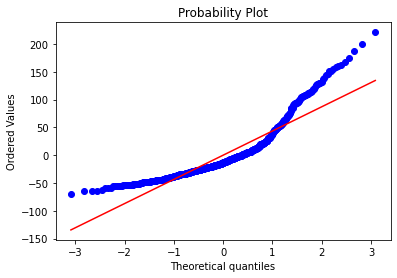

In [82]:
stats.probplot(resultado2.resid,dist="norm",plot=plt);
#Ao analisar os residos pode-se observar que eles não lineares.

In [76]:
x_dados=sm.add_constant(x)
a=resultado2.predict([1,10,4.7,1,False])

array([54.45190785])

In [102]:
#Regression Tree

In [89]:

from sklearn import tree
from sklearn.model_selection import train_test_split

y=rating['Price']
x=rating[['Stores','Rating','Type']]
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.3,random_state=1)
clf=tree.DecisionTreeRegressor()
clf=clf.fit(X_train,Y_train)



In [97]:

clf.score(X_test,Y_test)
#Valor encontrado negativo mostrando que o modelo tem uma performance péssima, já que os valores do score deveriam ser entre 0 e 1 tendo 1 como 100% de accuracy entre o modelo e a base.

-0.09830144236705185

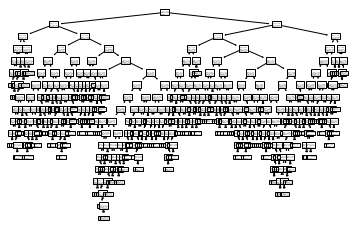

In [100]:
tree.plot_tree(clf);
#modelo não funciona ,ja que a arvore está muito profunda para o dataset (OVERFIT)

In [ ]:
#Com os resultados da regression tree pode-se comcluir que o dataset escolhido sofre de overfit, o que significa que o modelo criado funciona tão perfeitamente para o dataset em especifico que não pode ser aplicado para analisar qualquer outro dataset sobre o mesmo tema.
#Logo o metodo decision tree não seria o mais aconselhado de se utilizar nesta base de dados já que não seriamos capazes de atingir o target que é de pegar qualquer teclado disponivel no mercado e prever o seu valor.

In [28]:
%matplotlib inline

In [101]:
#Falta modelo 3D
# Update 19/11 ,faltando introdução, conclusão ajuste minimo na segunda analise,terminar terceira analise(que está sendo feita mas n será colocado nesse checkpoint) , e gráficos para melhor compreensão dos resultados obtidos

